# Clustering and Image Blurs

In this document, we demonstrate how zeroing out the high frequency Fourier coefficients of an image induces a Gaussian blur. This is similar to the effect of the heat equation, which attenuates high frequency components exponentially faster than lower frequency components. 

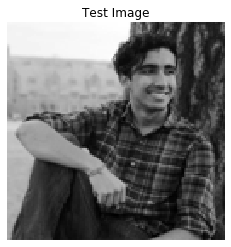

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def normalize_img(img):
    return (img - np.min(img))/np.ptp(img)

rishi_img = Image.open("images/rishi_fb.jpg").convert("L")
rishi_img.thumbnail((128, 128))
rishi = normalize_img(np.array(rishi_img))

plt.title("Test Image")
plt.axis('off')
plt.imshow(rishi, cmap="gray")
plt.show()

In [5]:
def two_d_fft(img, n=10):
    f = np.fft.fftshift(np.fft.fft2(img, norm="ortho"))
    half = int(len(f)/2)
    low_f = f[half-n:half+n + 1, half-n:half+n+1]
    return f, low_f

def two_d_ifft(f):
    return np.abs(np.fft.ifft2(np.fft.ifftshift(f), norm="ortho"))

rishi_waves, low_rishi_freqs = two_d_fft(rishi)

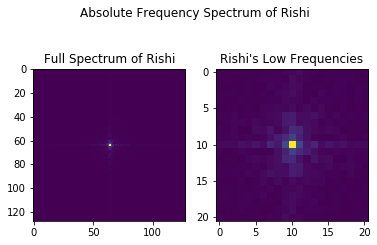

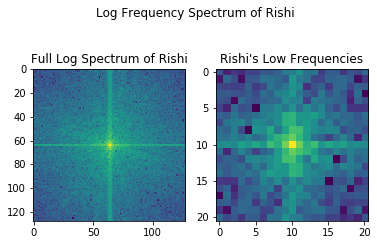

In [6]:
plt.subplot(1, 2, 1)
plt.title("Full Spectrum of Rishi")
plt.imshow(np.abs(rishi_waves))

plt.subplot(1, 2, 2)
plt.title("Rishi's Low Frequencies")
plt.imshow(np.abs(low_rishi_freqs))

plt.suptitle("Absolute Frequency Spectrum of Rishi")
plt.show()

plt.subplot(1, 2, 1)
plt.title("Full Log Spectrum of Rishi")
plt.imshow(np.log(np.abs(rishi_waves)))

plt.subplot(1, 2, 2)
plt.title("Rishi's Low Frequencies")
plt.imshow(np.log(np.abs(low_rishi_freqs)))

plt.suptitle("Log Frequency Spectrum of Rishi")
plt.show()

# Smooth Basis Functions

![](figures/slide_31.jpg)

# Smooth Rishi Approximations

Can we approximate rishi with just a few of these smooth basis functions?

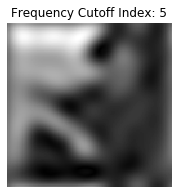

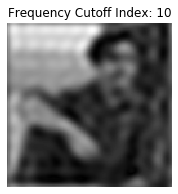

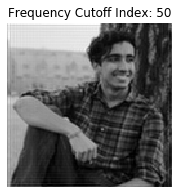

In [7]:
max_freq_radius = 40

for i, r in enumerate([5, 10, 50]):
    approx_r = np.fft.ifftshift(rishi_waves)
    #plt.subplot(1, 3, 1)
    plt.imshow(np.abs(np.fft.ifft2(approx_r, norm="ortho")), cmap="gray")
    approx_r[r : -r, :] = 0
    approx_r[:, r : -r] = 0
    approx_r = np.fft.fftshift(approx_r)
    #plt.subplot(1, 3, 2)
    #plt.imshow(np.nan_to_num(np.log(np.abs(approx_r)), neginf=0))
    plt.subplot(1, 3, i+1)
    plt.title(f"Frequency Cutoff Index: {r}")
    plt.imshow(np.abs(np.fft.ifft2(approx_r, norm="ortho")), cmap="gray")
    plt.axis('off')
    plt.gcf().set_size_inches((10, 10))
    plt.show()